# **Health Insurance Cost Prediction**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv("C:/Users/DELL/Downloads/Health insurance cost prediction/insurance.csv")

In [3]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,index,age,sex,bmi,children,smoker,region,charges
1333,1333,50,male,30.97,3,no,northwest,10600.5483
1334,1334,18,female,31.92,0,no,northeast,2205.9808
1335,1335,18,female,36.85,0,no,southeast,1629.8335
1336,1336,21,female,25.80,0,no,southwest,2007.9450
1337,1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.sample(3)

,index,age,sex,bmi,children,smoker,region,charges
280,280,40,female,28.12,1,yes,northeast,22331.5668
1329,1329,52,male,38.60,2,no,southwest,10325.2060
1116,1116,41,male,29.64,5,no,northeast,9222.4026


In [6]:
data.shape
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 1338
Number of columns: 8


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [8]:
data.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


# **Converting Data from String to Numerical values**

In [10]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [11]:
data["sex"]=data["sex"].map({"female":1,"male":0})

In [12]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [13]:
data["smoker"]=data["smoker"].map({"yes":1,"no":0})

In [14]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
data["region"]=data["region"].map({"southwest":1,"southeast":2,"northwest":3,"northeast":4})

In [16]:
data

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,1,27.900,0,1,1,16884.92400
1,1,18,0,33.770,1,0,2,1725.55230
2,2,28,0,33.000,3,0,2,4449.46200
3,3,33,0,22.705,0,0,3,21984.47061
4,4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,0,30.970,3,0,3,10600.54830
1334,1334,18,1,31.920,0,0,4,2205.98080
1335,1335,18,1,36.850,0,0,2,1629.83350
1336,1336,21,1,25.800,0,0,1,2007.94500


In [17]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,1,27.900,0,1,1,16884.92400
1,1,18,0,33.770,1,0,2,1725.55230
2,2,28,0,33.000,3,0,2,4449.46200
3,3,33,0,22.705,0,0,3,21984.47061
4,4,32,0,28.880,0,0,3,3866.85520


In [18]:
data.columns

Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [19]:
x=data.drop(columns=["index","children",'charges'],axis=1)
print(x)

      age  sex     bmi  smoker  region
0      19    1  27.900       1       1
1      18    0  33.770       0       2
2      28    0  33.000       0       2
3      33    0  22.705       0       3
4      32    0  28.880       0       3
...   ...  ...     ...     ...     ...
1333   50    0  30.970       0       3
1334   18    1  31.920       0       4
1335   18    1  36.850       0       2
1336   21    1  25.800       0       1
1337   61    1  29.070       1       3

[1338 rows x 5 columns]


In [20]:
y=data["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [22]:
x_train

,age,sex,bmi,smoker,region
1204,18,1,27.28,1,2
829,39,0,21.85,0,3
1077,21,0,26.03,0,4
416,52,0,34.10,0,2
1295,20,0,22.00,0,1
...,...,...,...,...,...
1242,22,1,21.28,0,3
924,43,0,23.20,0,1
1247,33,0,29.40,0,1
271,50,0,34.20,1,1


In [23]:
y_train

1204    18223.4512
829      6117.4945
1077     2102.2647
416      9140.9510
1295     1964.7800
           ...    
1242     4296.2712
924      6250.4350
1247     6059.1730
271     42856.8380
474     25382.2970
Name: charges, Length: 1070, dtype: float64

In [24]:
print(x_train.shape,y_train.shape)

(1070, 5) (1070,)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [27]:
x

,age,sex,bmi,smoker,region
0,19,1,27.900,1,1
1,18,0,33.770,0,2
2,28,0,33.000,0,2
3,33,0,22.705,0,3
4,32,0,28.880,0,3
...,...,...,...,...,...
1333,50,0,30.970,0,3
1334,18,1,31.920,0,4
1335,18,1,36.850,0,2
1336,21,1,25.800,0,1


In [28]:
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rfr.predict(x_test)
y_pred4=gbr.predict(x_test)

In [29]:
df1=pd.DataFrame({"Actual":y_test,"lr":y_pred1,"svm":y_pred2,"rfr":y_pred3,"gbr":y_pred4})

In [30]:
df1

,Actual,lr,svm,rfr,gbr
698,10976.24575,13877.387374,9191.729139,12190.549679,13054.052998
520,25656.57526,10656.961439,9151.734423,10577.018629,11103.777843
1144,9630.39700,11243.568929,9154.203808,9323.722542,10289.409734
908,15170.06900,17056.704674,9219.160881,13628.374861,14031.828263
559,1646.42970,5216.355895,8975.503933,3372.914753,4482.481638
...,...,...,...,...,...
851,14119.62000,14645.583863,9215.056289,14271.141133,15504.703631
109,47055.53210,39488.550592,9222.197050,48041.091699,46174.302622
941,9549.56510,16391.030618,9153.113426,10280.949803,10549.149395
600,1633.04440,6008.799841,8978.597468,4756.657038,3007.079209


In [31]:
import matplotlib.pyplot as plt

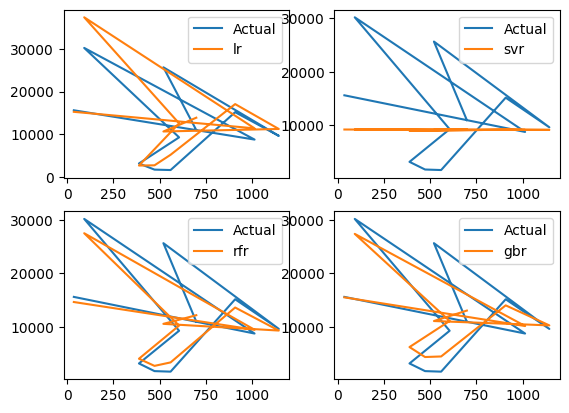

In [32]:
plt.subplot(221)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["lr"].iloc[0:11],label="lr")
plt.legend()

plt.subplot(222)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["svm"].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["rfr"].iloc[0:11],label="rfr")
plt.legend()

plt.subplot(224)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["gbr"].iloc[0:11],label="gbr")
plt.legend()

In [33]:
from sklearn import metrics
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [34]:
print(score1, score2, score3, score4)

0.7977459984591244 -0.12406461307362227 0.8817668373033426 0.9028686366701257


In [35]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [36]:
print(s1, s2, s3, s4)

3990.3136029612956 8375.31391566433 2477.842896778265 2190.4461052861016


In [37]:
data={"age":40,
      "sex":1,
      "bmi":40.30,
      "smoker":1,
      "region":2}
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,smoker,region
0,40,1,40.3,1,2


In [38]:
new_pred1=gbr.predict(df)
print("Prediction cost for new customer=",new_pred1)

Prediction cost for new customer= [42841.04987923]


In [39]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None
